# Bike sharing app assignment ( using linear regression)

### 1. Data Understanding and Exploration

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [1336]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [1337]:
import warnings
warnings.filterwarnings('ignore') #using this library to avoid any warnings

In [1338]:
#Let's first read our database

BS_day = pd.read_csv("day.csv")

In [1339]:
#Let's look how our dataset looks like
BS_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1340]:
#Let's look at the shape of our dataset
BS_day.shape

(730, 16)

In [1341]:
#Let's look at the columns of the given dataset
BS_day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [1342]:
# Getting insights of the features
# summary of all the numeric columns
BS_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1343]:
# Summary of the dataset: 730 rows, 16 columns, no null values
BS_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1344]:
#Before going forward let's make the instant variable as object type, as it may affect our analysis
BS_day['instant'] = BS_day['instant'].astype('object')

In [1345]:
#Applying value count on the season column
BS_day['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

#### Understanding the Data Dictionary and parts of Data Preparation

The data dictionary contains the meaning of various attributes; some of which are explored and manipulated here:

In [1346]:
# Converting the season column data to categorical data as provided in the data dictionary 
#(1:spring, 2:summer, 3:fall, 4:winter)

def map_season(x):
    if x == 1:
        return 'spring'
    elif x == 2:
        return 'summer'
    elif x == 3:
        return 'fall'
    elif x == 4:
        return 'winter'

# Apply the function to the 'season' column

BS_day['season'] = BS_day['season'].apply(map_season)

In [1347]:
#now looking at the season column
BS_day['season'].value_counts()


season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [1348]:
BS_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


- We can see above that the numeric values have now changed to categorical .
- lets do the same for the rest of the categorical columns which have been coded numericaly.


In [1349]:
# year (0: 2018, 1:2019)
BS_day['yr'].value_counts()


yr
0    365
1    365
Name: count, dtype: int64

In [1350]:
# Define a function to map the year numbers to their corresponding years
def map_year(x):
    if x == 0:
        return 2018
    else:
        return 2019
    
BS_day['yr'] = BS_day['yr'].apply(map_year)    

In [1351]:
BS_day['yr'].value_counts()

yr
2018    365
2019    365
Name: count, dtype: int64

In [1352]:
#Changing the type of yr to make it categorical instead of numeric
BS_day['yr'] = BS_day['yr'].astype('object')

In [1353]:
BS_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1354]:
# Let's do the same with month column
def map_month(x):
    if x == 1:
        return 'January'
    elif x == 2:
        return "february"
    elif x == 3:
        return "March"
    elif x == 4:
        return "April"
    elif x == 5:
        return "May"
    elif x == 6:
        return "June"
    elif x == 7:
        return "July"
    elif x == 8:
        return "August"
    elif x == 9:
        return "September"
    elif x == 10:
        return "October"
    elif x == 11:
        return "November"
    else:
        return "December"
    
#Applying the above fucntion to the dataset

BS_day['mnth'] = BS_day['mnth'].apply(map_month)

In [1355]:
BS_day['mnth'].value_counts()

mnth
January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
february     56
Name: count, dtype: int64

In [1356]:
BS_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,January,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,January,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,January,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,January,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,January,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1357]:
# whether day is a holiday or not (0: No, 1: Yes)
BS_day['holiday'].value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [1358]:
def map_holiday(x):
    if x == 0:
        return 'No'
    else:
        return 'Yes'
    
BS_day['holiday'] = BS_day['holiday'].apply(map_holiday)

In [1359]:
BS_day['holiday'].value_counts()

holiday
No     709
Yes     21
Name: count, dtype: int64

In [1360]:
# Assigning string values to weekdays instead of numeric values. These values may misindicate some order to it.
# A function has been created to map the actual numbers to categorical levels.
def map_weekday(x):
    weekday_mapping ={
        0:'Sunday',
        1:'Monday',
        2:'Tuesday',
        3:'Wednesday',
        4:'Thursday',
        5:'Friday',
        6:'Saturday'
    }
    return weekday_mapping.get(x,'Invaid')

# Applying the function to the column
BS_day['weekday'] = BS_day['weekday'].apply(map_weekday)

In [1361]:
BS_day['weekday'].value_counts()

weekday
Monday       105
Tuesday      105
Wednesday    104
Thursday     104
Friday       104
Saturday     104
Sunday       104
Name: count, dtype: int64

In [1362]:
BS_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,January,No,Monday,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,January,No,Tuesday,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,January,No,Wednesday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,January,No,Thursday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,January,No,Friday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1363]:
# Let's do the same with workingday column

def map_workingday(x):
    if x == 0:
        return 'No'
    else:
        return 'Yes'
    
BS_day['workingday'] = BS_day['workingday'].apply(map_workingday)

In [1364]:
BS_day['workingday'].value_counts()

workingday
Yes    504
No     226
Name: count, dtype: int64

In [1365]:
BS_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,January,No,Monday,Yes,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,January,No,Tuesday,Yes,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,January,No,Wednesday,Yes,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,January,No,Thursday,Yes,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,January,No,Friday,Yes,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1366]:
def map_weathersit(x):
    if x == 1:
        return 'A'
    elif x == 2:
        return 'B'
    elif x == 3:
        return 'C'
    else:
        return 'D'
    
BS_day['weathersit'] = BS_day['weathersit'].apply(map_weathersit)    

In [1367]:
BS_day['weathersit'].value_counts()

weathersit
A    463
B    246
C     21
Name: count, dtype: int64

In [1368]:
BS_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,January,No,Monday,Yes,B,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,January,No,Tuesday,Yes,B,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,January,No,Wednesday,Yes,A,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,January,No,Thursday,Yes,A,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,January,No,Friday,Yes,A,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1369]:
# Extracting the type of weather situations present in the data

BS_day['weathersit'].unique()

array(['B', 'A', 'C'], dtype=object)

### 2. Data Visualisation

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- Understanding the distribution of various numeric variables 
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

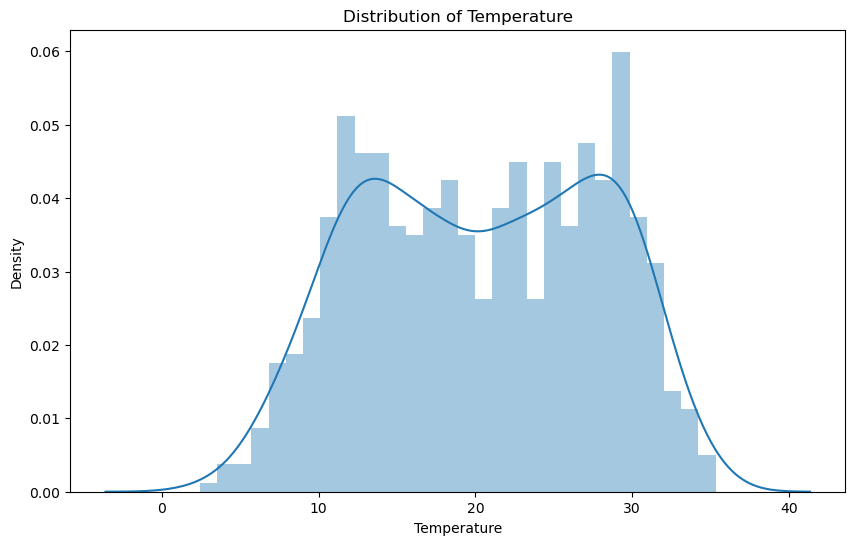

In [1370]:
# Create a distplot of the temp column
plt.figure(figsize=(10, 6))
sns.distplot(BS_day['temp'], kde=True, bins=30)

# Add labels and title
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.title('Distribution of Temperature')

# Show the plot
plt.show()

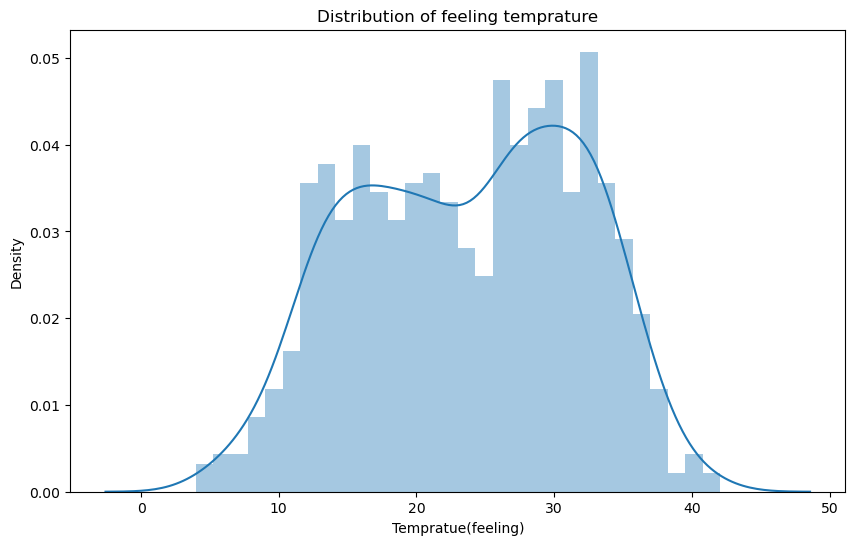

In [1371]:
# Now doing the same with atemp column

plt.figure(figsize=(10,6))
sns.distplot(BS_day['atemp'],kde=True,bins=30)

#Add labels and titles

plt.xlabel("Tempratue(feeling)")
plt.ylabel("Density")
plt.title("Distribution of feeling temprature")

# Show the plot
plt.show()

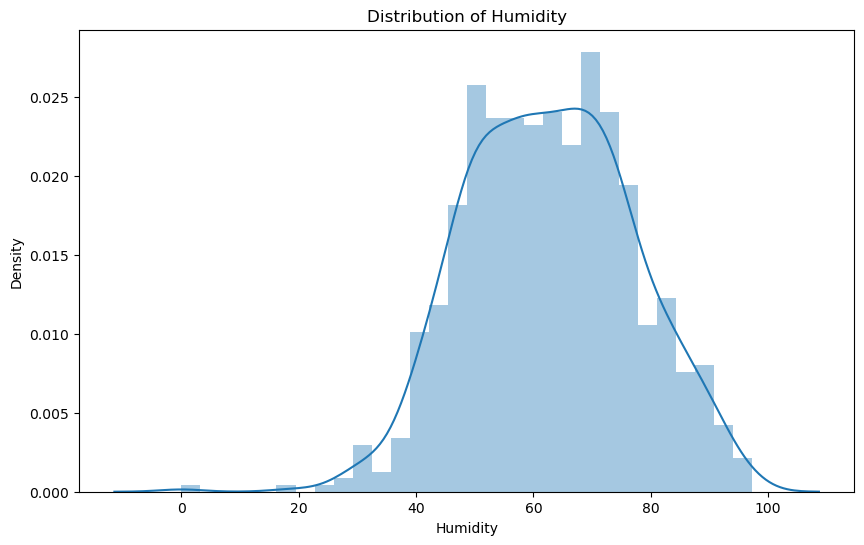

In [1372]:
# Now doing the same with humidity column

plt.figure(figsize=(10,6))
sns.distplot(BS_day['hum'],kde=True,bins=30)

#Add labels and titles

plt.xlabel("Humidity")
plt.ylabel("Density")
plt.title("Distribution of Humidity")

# Show the plot
plt.show()


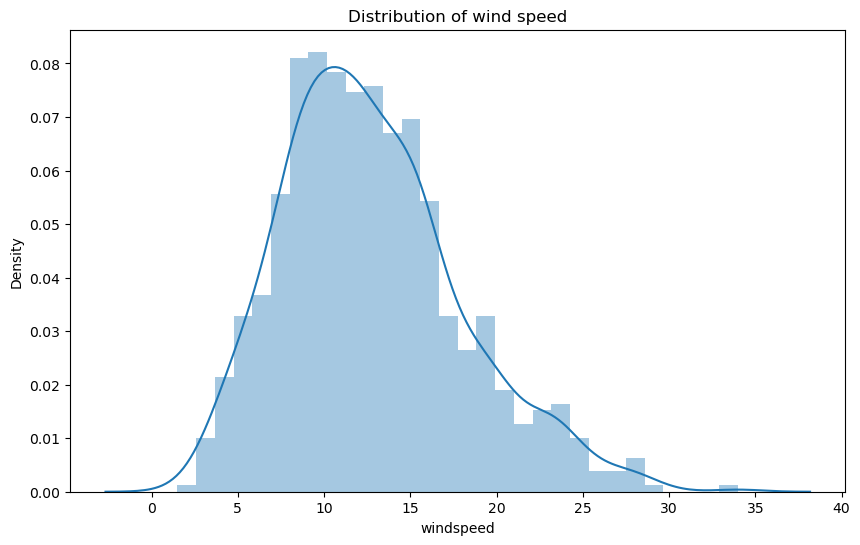

In [1373]:
# Now doing the same with wind speed column

plt.figure(figsize=(10,6))
sns.distplot(BS_day['windspeed'],kde=True,bins=30)

#Add labels and titles

plt.xlabel("windspeed")
plt.ylabel("Density")
plt.title("Distribution of wind speed")

# Show the plot
plt.show()

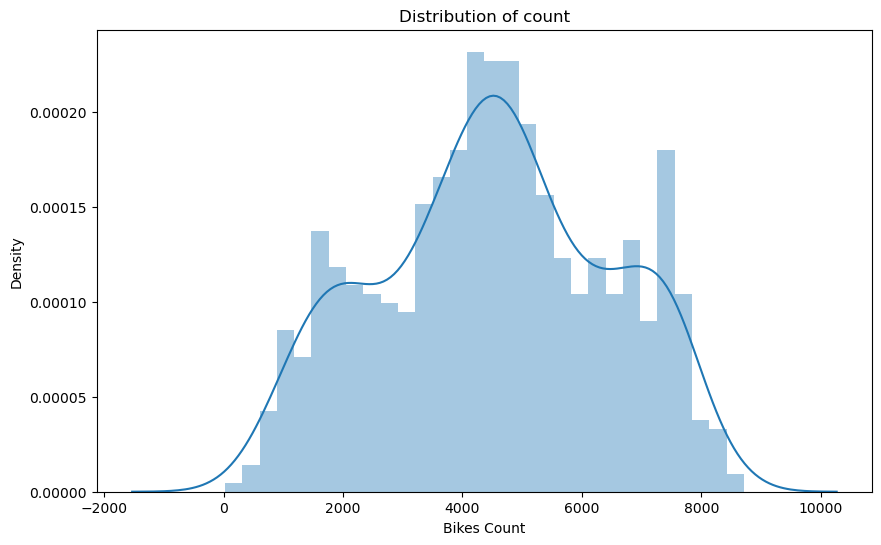

In [1374]:
# Target variable: count of total rental bikes including both casual and registered

plt.figure(figsize=(10,6))
sns.distplot(BS_day['cnt'],kde=True,bins=30)

#Add labels and titles

plt.xlabel("Bikes Count")
plt.ylabel("Density")
plt.title("Distribution of count")

# Show the plot
plt.show()

- Here we can see that most of these columns are normally distributed (roughly) and we can use all of these columns in our model 
to get some use full insights regaring the dataset.

In [1375]:
#Looking at the columns of the BS_day dataset.
BS_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    object 
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    object 
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    object 
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    object 
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(9)
memory usage: 91.4+ KB


In [1376]:
# Converting date to datetime format (ISO format)

BS_day['dteday'] = pd.to_datetime(BS_day['dteday'],format = '%d-%m-%Y').astype('datetime64[ns]')

In [1377]:
#checking the data
BS_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,January,No,Monday,Yes,B,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,2018,January,No,Tuesday,Yes,B,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,spring,2018,January,No,Wednesday,Yes,A,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,spring,2018,January,No,Thursday,Yes,A,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,spring,2018,January,No,Friday,Yes,A,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1378]:
#Select all the columns that are categorical excluding float, datetime and int64 datatype columns
BS_day_cat = BS_day.select_dtypes(exclude=['float64','datetime64','int64'])
#dropping the instant variable from the dataset as it is only required for indicating record id
BS_cat = BS_day_cat.drop(columns=['instant'])

# Storing all the categorical columns in the cat_cols variable
cat_cols = BS_cat.columns

print(cat_cols)

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')


In [1379]:
BS_cat

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,spring,2018,January,No,Monday,Yes,B
1,spring,2018,January,No,Tuesday,Yes,B
2,spring,2018,January,No,Wednesday,Yes,A
3,spring,2018,January,No,Thursday,Yes,A
4,spring,2018,January,No,Friday,Yes,A
...,...,...,...,...,...,...,...
725,spring,2019,December,No,Friday,Yes,B
726,spring,2019,December,No,Saturday,No,B
727,spring,2019,December,No,Sunday,No,B
728,spring,2019,December,No,Monday,Yes,A


- Now we have an idea of what are the different categorical columns in our data set. Let's visualize them to get better insights.

### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

<Axes: xlabel='weathersit', ylabel='cnt'>

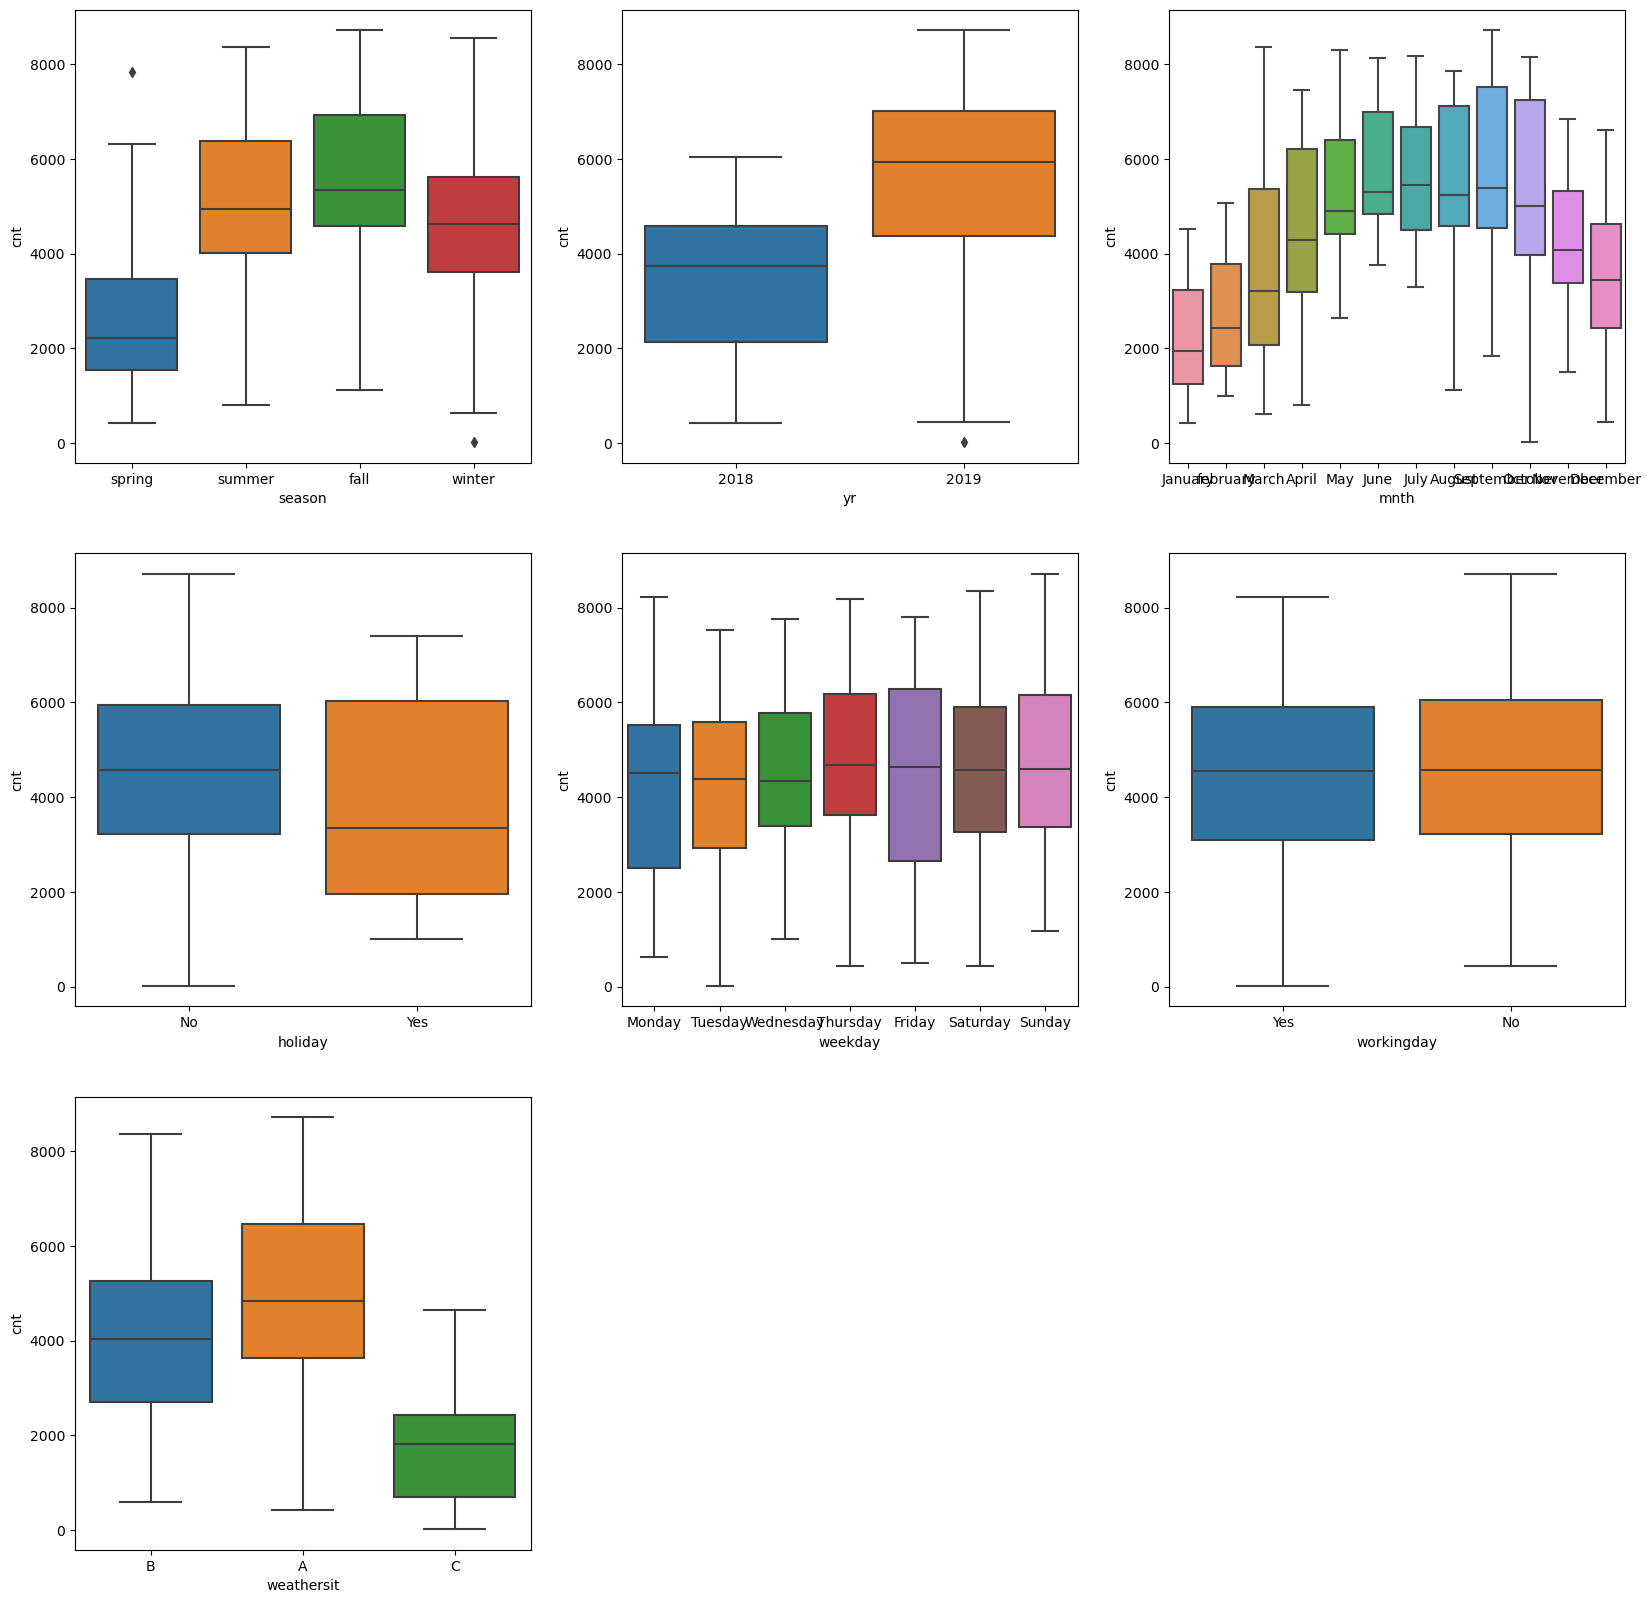

In [1380]:
#specifying the size of the figure

plt.figure(figsize=(20, 20))  

#plotting the season subplot
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data= BS_day)

#plotting the year subplot
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=BS_day)

#plotting the month subplot
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=BS_day)

#plotting the holiday subplot
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=BS_day)

#plotting the weekday subplot
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=BS_day)

#plotting the workingday subplot
plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=BS_day)

#plotting the weathersit subplot
plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=BS_day)



### Insights from the Boxplots:
#### Season vs Count:

- Winter and spring have a relatively lower range of bike rentals compared to fall and Summer.
- The highest median count of rentals is observed in Summer, indicating a seasonal trend in bike rentals.

#### Year vs Count:

- There is a noticeable increase in bike rentals from 2018 (yr=0) to 2019 (yr=1). This suggests a growth trend in the popularity of bike rentals over the years.

#### Month vs Count:

- Bike rentals tend to be higher during the warmer months (May to October) and lower during the colder months (November to April).

#### Holiday vs Count:

- Non-holidays generally have higher bike rental counts compared to holidays. This could be due to more people using bikes for commuting on regular working days.

#### Weekday vs Count:

- Weekends (Saturday and Sunday) show a higher median count of rentals compared to weekdays.
- This indicates higher recreational usage of bikes during weekends.

#### Workingday vs Count:

- Non-working days (weekends and holidays) show a higher count of rentals compared to working days.
- This reinforces the recreational use pattern observed in the weekday analysis.

#### Weathersit vs Count:

- The best weather conditions (Clear weather) have the highest median count of rentals.
- Adverse weather conditions (Mist, Light rain/snow) significantly reduce the number of bike rentals.

##### These insights suggest that bike rentals are influenced by seasonality, day of the week, holiday status, and weather conditions. This information can be useful for planning and optimizing bike rental operations, marketing strategies, and resource allocation.

### Visualising Numeric Variables
- Now that we got a rough idea of how the categorical columns contribute to the model. Our job now is to find the correlation between
  the target(cnt)  variable and the numeric variables. 
- We will also try to find multi-collinearity between varaibles to make our model more effective.

In [1381]:
#looking at all the numeric columns

BS_day.select_dtypes(exclude=['object','datetime64[ns]']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        730 non-null    float64
 1   atemp       730 non-null    float64
 2   hum         730 non-null    float64
 3   windspeed   730 non-null    float64
 4   casual      730 non-null    int64  
 5   registered  730 non-null    int64  
 6   cnt         730 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 40.1 KB


In [1382]:
#First let's segregate the numeric data into a different object

BS_day_num = BS_day.select_dtypes(exclude=['object','datetime64'])

# Storing all the numeric columns in the num_cols variable
num_cols = BS_day_num.columns

print(num_cols)

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')


In [1383]:
BS_day_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        730 non-null    float64
 1   atemp       730 non-null    float64
 2   hum         730 non-null    float64
 3   windspeed   730 non-null    float64
 4   casual      730 non-null    int64  
 5   registered  730 non-null    int64  
 6   cnt         730 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 40.1 KB


In [1384]:
BS_day_num.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331,654,985
1,14.902598,17.68695,69.6087,16.652113,131,670,801
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1385]:
# Making all the numerical columns as float64 datatype to have simmilar and inclusive datatype across all numeric columns

for i in num_cols:
    BS_day_num[i] = BS_day_num[i].astype('float64')

In [1386]:
BS_day_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        730 non-null    float64
 1   atemp       730 non-null    float64
 2   hum         730 non-null    float64
 3   windspeed   730 non-null    float64
 4   casual      730 non-null    float64
 5   registered  730 non-null    float64
 6   cnt         730 non-null    float64
dtypes: float64(7)
memory usage: 40.1 KB


- Lets drop the 'cnt' variable from our numeric table as 'cnt' is the target variable and we only want to analyse the independent variables in the dataset.

In [1387]:
BS_num = BS_day_num.drop(columns=['cnt'])

In [1388]:
BS_num.head()

,temp,atemp,hum,windspeed,casual,registered
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0


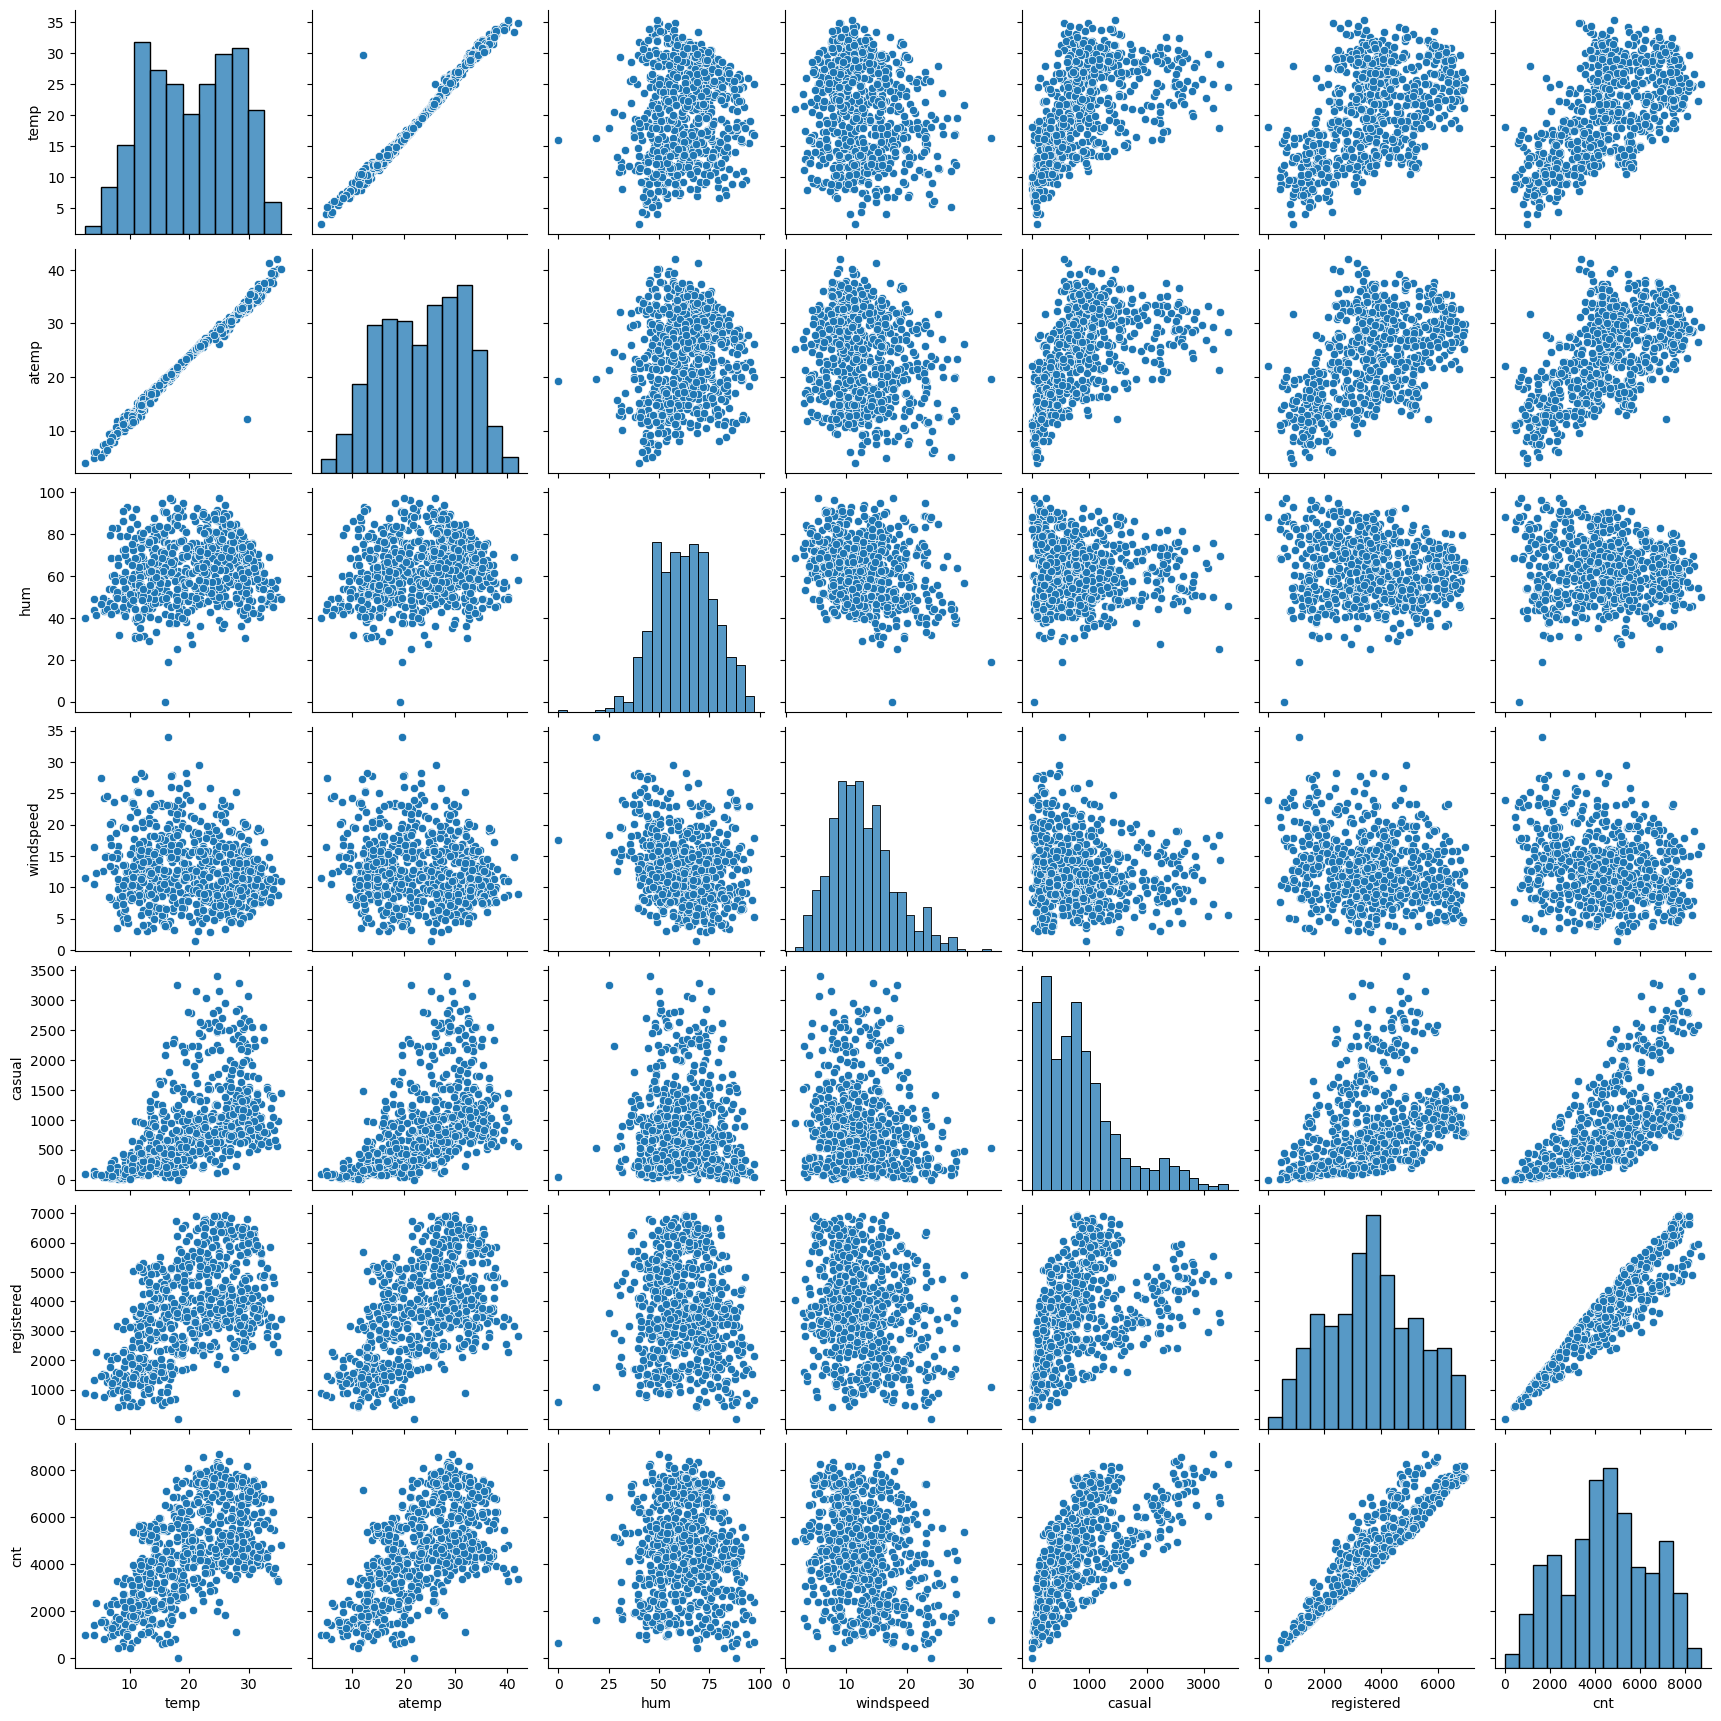

In [1453]:
#Making a pairplot of the numeric columns
sns.pairplot(BS_day_num)
plt.show()

### Insights from Pairplot

#### Temperature vs. Feeling Temperature:

- The temp and atemp columns are expected to be highly correlated, reflecting a strong linear relationship.
#### Temperature vs. Humidity:

- There might be a negative correlation between temp and hum, indicating that higher temperatures tend to have lower humidity.
#### Temperature vs. Windspeed:

- The relationship between temp and windspeed could show some pattern, possibly indicating seasonal effects where higher      temperatures might correlate with certain wind patterns.
#### Casual vs. Registered Users:

- There may be a linear relationship between casual and registered users, indicating that on days with high casual rentals, registered rentals are also likely high.
#### Casual and Registered vs. Weather Variables:

- Analyzing the scatter plots of casual and registered against temp, hum, and windspeed can reveal how weather conditions influence bike rentals.
#### Weather Variables Interrelationship:

- The scatter plots among temp, hum, windspeed, and season can show how these weather-related variables interact with each other.

### Addressing multi-collinearity

- First before dropping any variables let's plot correlation matrix between variables to know 
  the exact values of correlation between them. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [1457]:
# Calculate the correlation matrix
corr_mat = BS_num.corr()

In [1458]:
corr_mat

,temp,atemp,hum,windspeed,casual,registered
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000


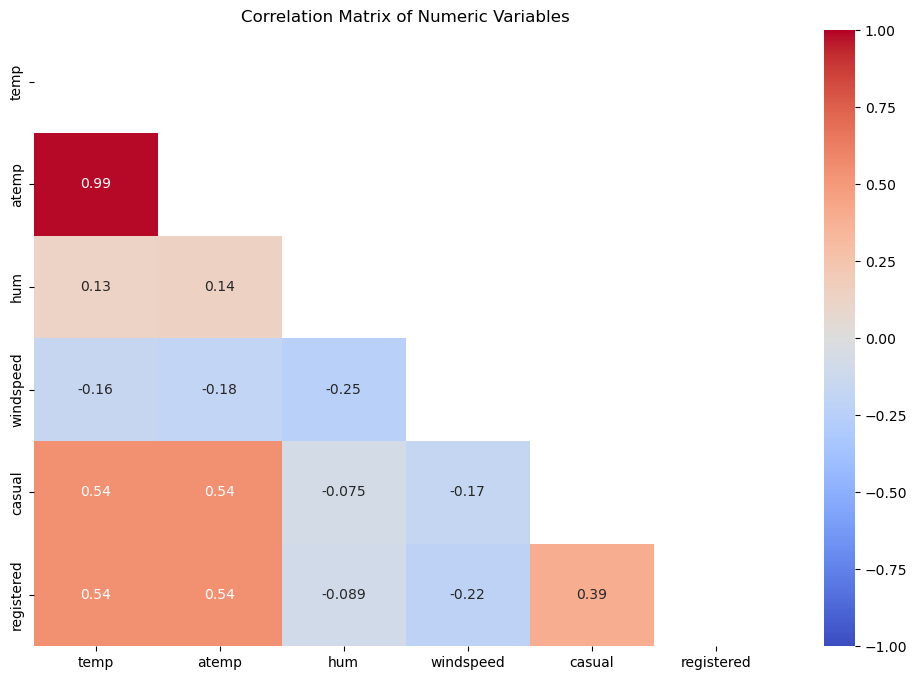

In [1459]:
# Plotting the heat map based on the correlation matrix

plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
sns.heatmap(corr_mat, annot=True,mask = mask, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

### Key Insights
#### Temperature (temp) and Feeling Temperature (atemp):

- As expected, temp and atemp show a very high positive correlation (close to 1). This indicates that these two variables are almost linearly dependent. The feeling temperature is derived from the actual temperature, which explains this strong relationship.
#### Temperature (temp) and Humidity (hum):

- There is a noticeable negative correlation between temp and hum. Higher temperatures are often associated with lower humidity levels, especially in temperate regions.
#### Temperature (temp) and Windspeed (windspeed):

- temp and windspeed may have a low to moderate negative correlation. This could reflect seasonal wind patterns where certain temperatures are associated with higher or lower wind speeds.
#### Casual and Registered Users:

- casual and registered users have a high positive correlation. This suggests that on days with high casual rentals, registered rentals also tend to be high, indicating overall higher bike usage on such days.
#### Casual Users and Weather Variables:

- Positive Correlation with Temperature (temp): Casual users are likely to increase with higher temperatures, showing a positive correlation.
- Negative Correlation with Humidity (hum): Casual rentals decrease as humidity increases, indicating that humid conditions deter casual bike usage.
- Negative Correlation with Windspeed (windspeed): Higher wind speeds tend to reduce casual bike rentals.
#### Registered Users and Weather Variables:

- Positive Correlation with Temperature (temp): Similar to casual users, registered users also tend to increase with higher -temperatures.
- Negative Correlation with Humidity (hum): Registered rentals decrease as humidity increases.
- Negative Correlation with Windspeed (windspeed): Higher wind speeds also deter registered bike usage.

### Now that we have a brief idea how different numeric variables are corrlated let's, calculate the VIF for the columns to see if multi-collinearity is there between the independent variables.

In [1393]:
# Calculate VIF for each numeric column excluding 'cnt'
X = BS_day_num
X = BS_day_num.drop(columns=['cnt'])
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,Feature,VIF
0,temp,491.657329
1,atemp,564.012771
2,hum,11.376900
3,windspeed,4.716426
4,casual,3.777121
5,registered,8.832357


- We can see that atemp has a very very high VIF(greater than 5) which can affect our model. 
  So, let's remove this column and calculate our VIF again

In [1394]:
adjusted_data = BS_day_num.drop(columns=['atemp','cnt'])

X = adjusted_data
vif_data= pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

vif_data

,Feature,VIF
0,temp,15.404356
1,hum,9.401700
2,windspeed,4.716271
3,casual,3.761199
4,registered,8.569443


In [1395]:
# We can see the temp column has still a vary high VIF vlaue
# Let's go ahead and remove temp as it has the highest VIF
adjusted_data = BS_day_num.drop(columns=['atemp','cnt','temp'])

X = adjusted_data
vif_data= pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

vif_data



,Feature,VIF
0,hum,7.349972
1,windspeed,4.650623
2,casual,2.973421
3,registered,6.410961


- We have now removed the variables from our dataset that can cause multi-collinearity. It does not make sense to remove any more variables but, we still have some multi-collinearity. This will be addressed further by using the Ridge Regression.

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.
Note that we had not included 'yr', 'mnth', 'holiday', 'weekday' and 'workingday' as object variables in the initial data exploration steps so as to avoid too many dummy variables creation. They have binary values: 0s and 1s in them which have specific meanings associated with them.

In [1396]:
BS_day.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,January,No,Monday,Yes,B,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,2018,January,No,Tuesday,Yes,B,14.902598,17.68695,69.6087,16.652113,131,670,801


In [1397]:
BS_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    object        
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [1398]:
# We previously created the BS_cat variable to store all the categorical column

BS_cat.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,spring,2018,January,No,Monday,Yes,B
1,spring,2018,January,No,Tuesday,Yes,B
2,spring,2018,January,No,Wednesday,Yes,A
3,spring,2018,January,No,Thursday,Yes,A
4,spring,2018,January,No,Friday,Yes,A


#### Dummy Variables
The variable `season`,`mnth`,`weekday` and `weathersit` have different levels. We need to convert these levels into integers. 

For this, we will use something called `dummy variables`.

In [1399]:
BS_day_dummies = pd.get_dummies(BS_cat[cat_cols], drop_first=True)
BS_day_dummies = BS_day_dummies.astype(int)
BS_day_dummies.head()

,season_spring,season_summer,season_winter,yr_2019,mnth_August,mnth_December,mnth_January,mnth_July,mnth_June,mnth_March,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [1400]:
# Let's see what is our categorical data
list(BS_cat.columns)

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [1401]:
# Drop categorical variable columns
BS_day = BS_day.drop(columns=BS_cat)

In [1402]:
#Concatinating the dummy variables with the main dataset
BS_day = pd.concat([BS_day, BS_day_dummies], axis=1)

In [1403]:
BS_day.head()

,instant,dteday,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_B,weathersit_C
0,1,2018-01-01,14.110847,18.18125,80.5833,10.749882,331,654,985,1,...,0,1,0,0,0,0,0,1,1,0
1,2,2018-01-02,14.902598,17.68695,69.6087,16.652113,131,670,801,1,...,0,0,0,0,0,1,0,1,1,0
2,3,2018-01-03,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,...,0,0,0,0,0,0,1,1,0,0
3,4,2018-01-04,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,...,0,0,0,0,1,0,0,1,0,0
4,5,2018-01-05,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,...,0,0,0,0,0,0,0,1,0,0


In [1404]:
# Drop the 'instant' and 'dteday' column as they of not any use to us for the analysis
BS_day = BS_day.drop(columns=['instant','dteday'])
BS_day.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_B,weathersit_C
0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,...,0,1,0,0,0,0,0,1,1,0
1,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,...,0,0,0,0,0,1,0,1,1,0
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [1405]:
#Let's look at the columns of our dataset
BS_day.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'yr_2019',
       'mnth_August', 'mnth_December', 'mnth_January', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'mnth_february', 'holiday_Yes', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'workingday_Yes',
       'weathersit_B', 'weathersit_C'],
      dtype='object')

In [1406]:
len(BS_day.columns)

32

In [1407]:
#Let's drop the 'atemp' variable as we found previously that it has a huge VIF value leading to multi-collinearity
# Also, drop columns 'casual' and 'registered', as they sum up to column 'cnt'.
# So lets only keep column 'cnt'
BS_day = BS_day.drop(columns=['atemp','casual','registered'])
BS_day.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_August,mnth_December,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_B,weathersit_C
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [1408]:
BS_day.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_August', 'mnth_December',
       'mnth_January', 'mnth_July', 'mnth_June', 'mnth_March', 'mnth_May',
       'mnth_November', 'mnth_October', 'mnth_September', 'mnth_february',
       'holiday_Yes', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'workingday_Yes', 'weathersit_B', 'weathersit_C'],
      dtype='object')

In [1409]:
len(BS_day.columns)

29

### Scaling

Now  we need to scale the variables for better interpretability. But we only need the scale the numeric columns and not the dummy variables. 

In [1410]:
#  using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [1411]:
num_vars = ['temp', 'hum', 'windspeed']

BS_day[num_vars] = scaler.fit_transform(BS_day[num_vars])

## 4. Model Building and Evaluation

Let's start building the model. The first step to model building is the usual test-train split. So let's perform that

In [1412]:
X = BS_day.drop(columns=['cnt'])
y = BS_day['cnt']

In [1413]:
X.shape

(730, 28)

In [1414]:
y.shape

(730,)

In [1415]:
#Lets split the data in to train test splits
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [1416]:
X_train.head()

,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_August,mnth_December,mnth_January,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_B,weathersit_C
239,0.807351,0.577650,0.581909,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
97,0.344785,0.859897,0.421794,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
503,0.673950,0.469152,0.126957,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
642,0.692641,0.645244,0.173084,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
498,0.640722,0.811911,0.392314,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0


In [1417]:
y_train.head()

239    4334
97     1471
503    8294
642    8156
498    2843
Name: cnt, dtype: int64

In [1418]:
X_train.describe().columns

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_August', 'mnth_December',
       'mnth_January', 'mnth_July', 'mnth_June', 'mnth_March', 'mnth_May',
       'mnth_November', 'mnth_October', 'mnth_September', 'mnth_february',
       'holiday_Yes', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'workingday_Yes', 'weathersit_B', 'weathersit_C'],
      dtype='object')

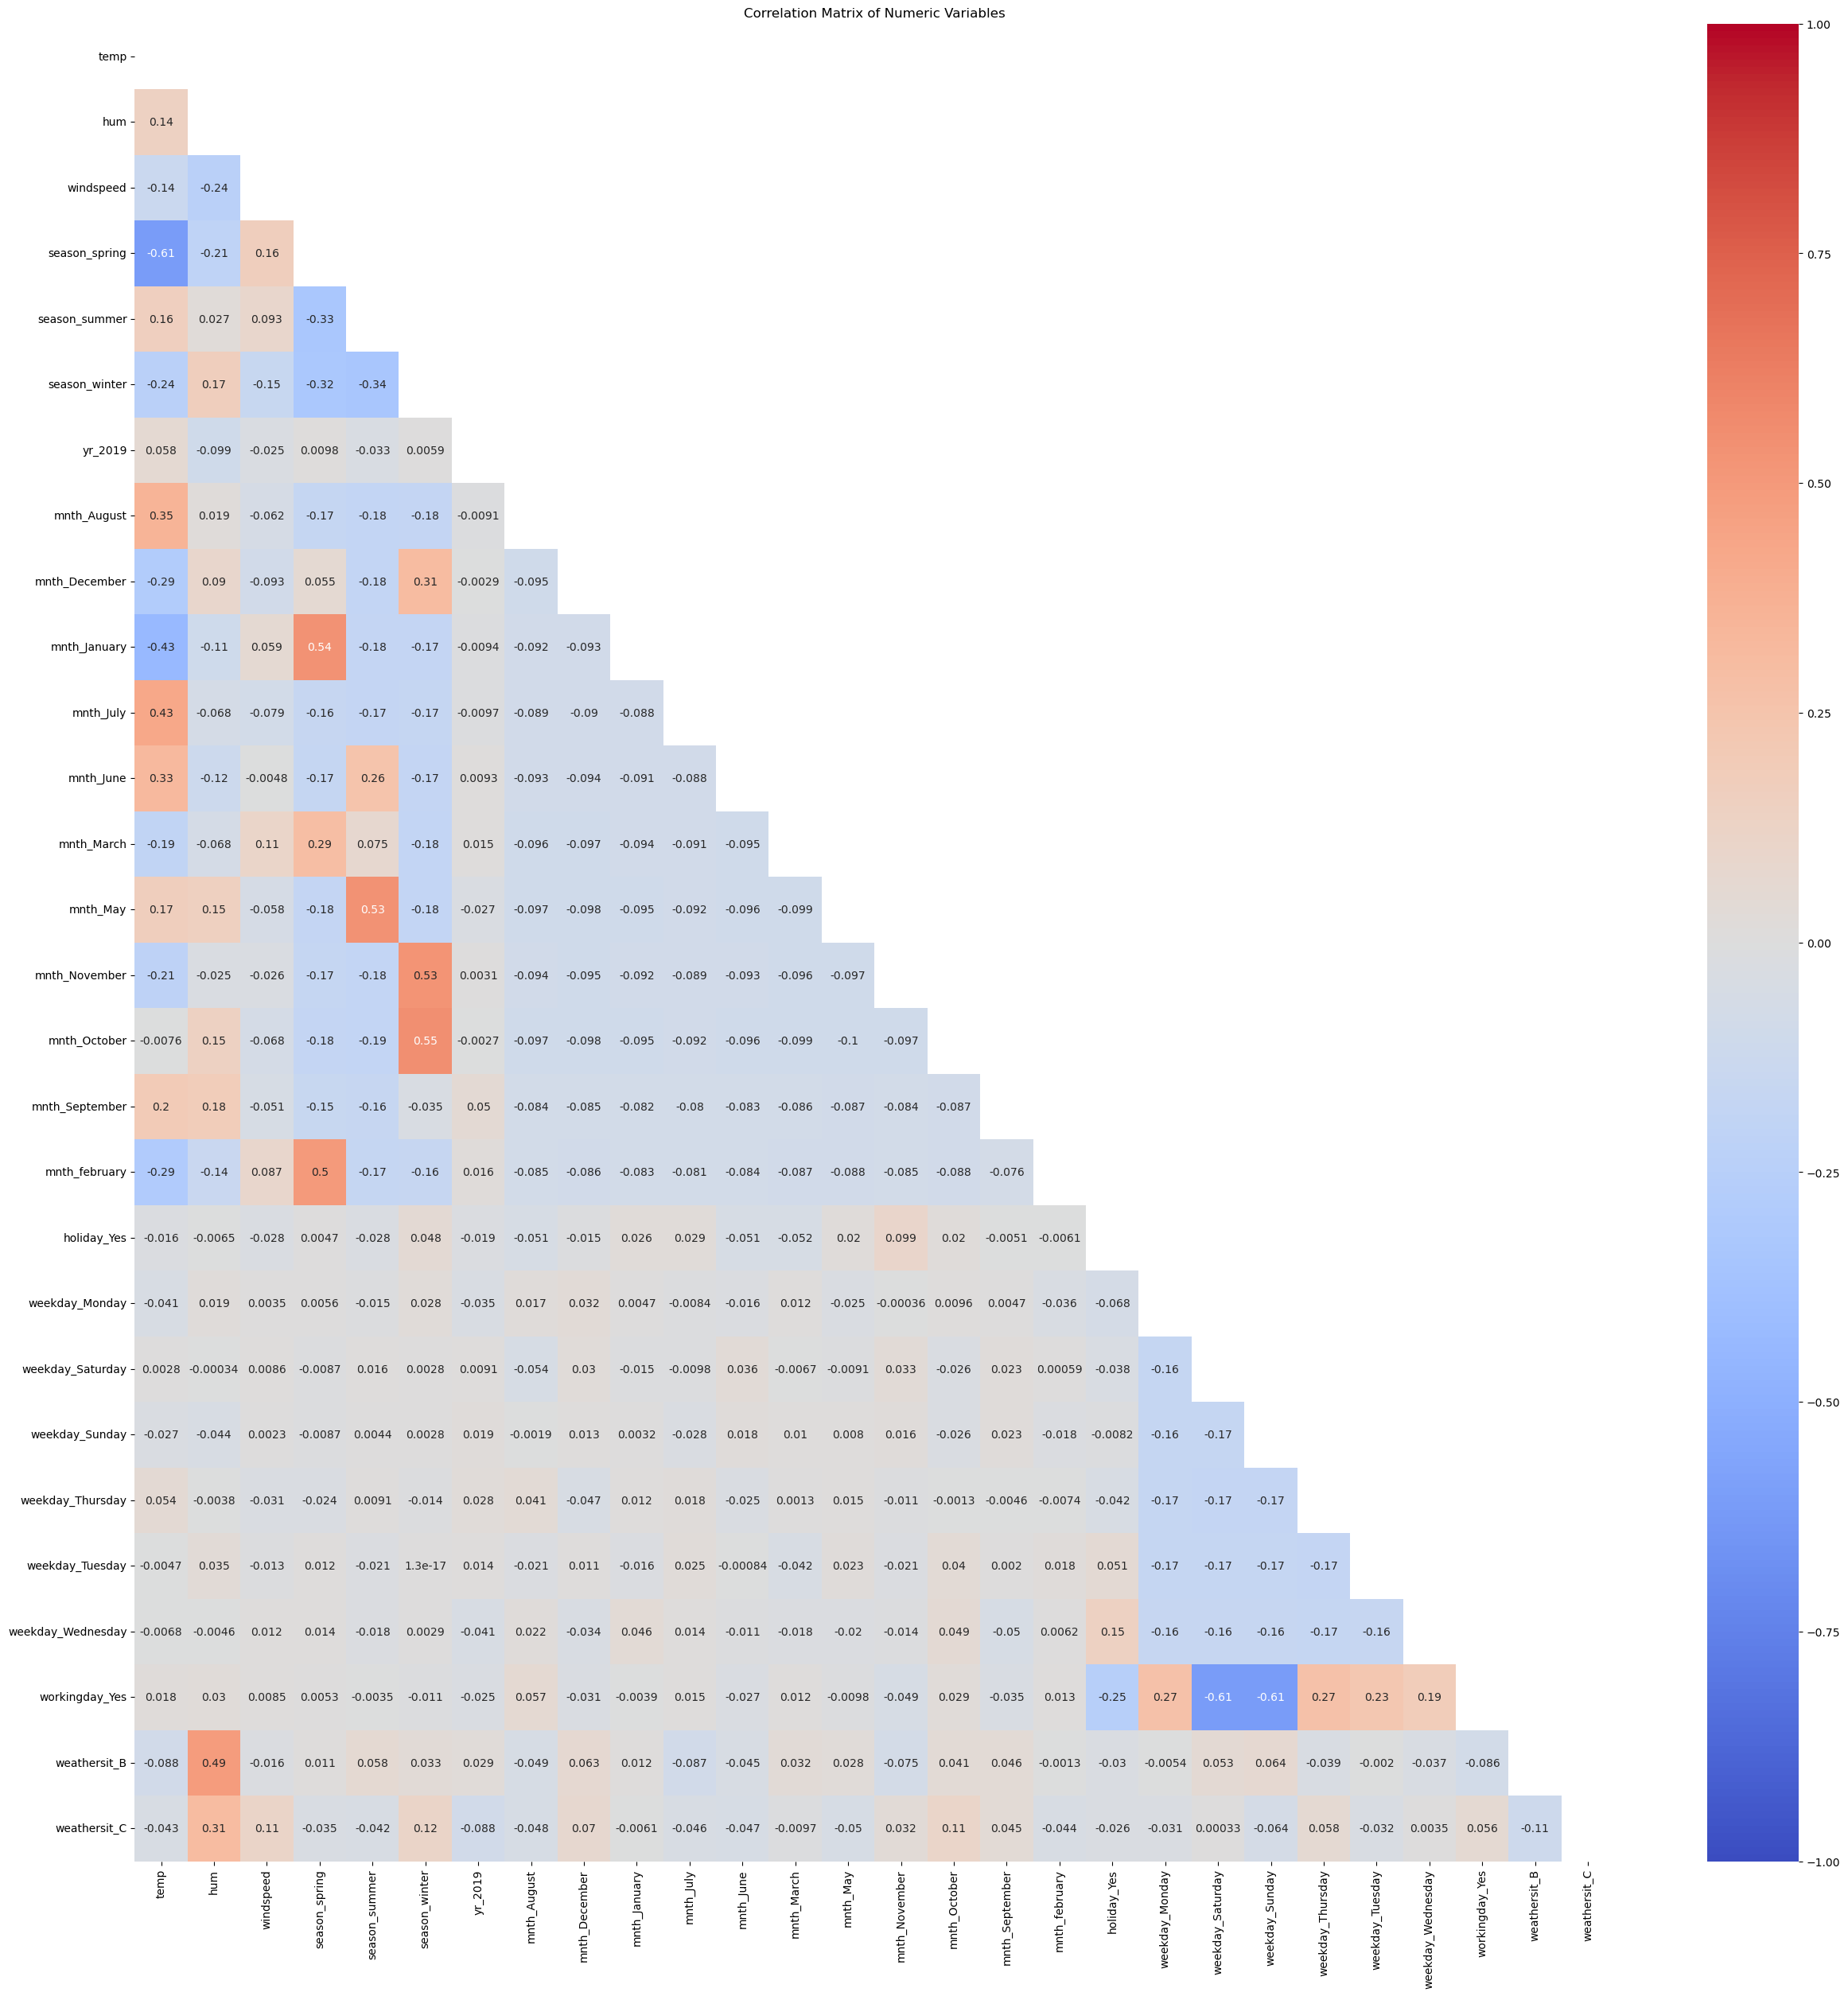

In [1419]:
# Let's check the correlation coefficients to see which variables are highly correlated
corr_mat = X_train.corr()
plt.figure(figsize = (30, 30))
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
sns.heatmap(corr_mat, annot=True,mask = mask, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

### Key Insights from the Correlation Matrix
#### Temperature (temp)
- Seasonal Variation:
    - Positive Correlation:
        - temp has a strong positive correlation with mnth_July (0.425590), mnth_August (0.354234), and mnth_June (0.326224), indicating higher temperatures during these summer months.
        - It is also positively correlated with season_summer (0.157823), which aligns with the expectation that summer months have higher temperatures.
    - Negative Correlation:
        - temp has a strong negative correlation with mnth_January (-0.430017), mnth_December (-0.287542), and mnth_November (-0.214217), indicating lower temperatures during these winter months.
        - It is negatively correlated with season_winter (-0.241693) and season_spring (-0.210214).
#### Humidity (hum)
- Weather and Temperature Relationship:
    - Positive Correlation:
        - hum has a strong positive correlation with weathersit_B (0.488811), suggesting that higher humidity is associated with a specific weather situation type B.
    - Negative Correlation:
        - hum has a moderate negative correlation with temp (-0.141291), indicating that higher temperatures are typically associated with lower humidity.
#### Windspeed (windspeed)
- Wind and Humidity:
    - Negative Correlation:
        - windspeed has a moderate negative correlation with hum (-0.235696), indicating that higher wind speeds are associated with lower humidity levels.
#### Seasonal and Monthly Correlations
- Seasonal Indicators:
    - Negative Correlation:
        - season_winter and season_summer are negatively correlated (-0.342467), reflecting that these are opposing seasons.
        - season_winter is negatively correlated with summer months (mnth_July, mnth_August), indicating these months are not part of winter.
        - season_summer is negatively correlated with winter months (mnth_January, mnth_December), indicating these months are not part of summer.
- Weekday Indicators
    - Weekday Effects:
        - Low Correlation:
            - Weekday indicators (weekday_Monday, weekday_Tuesday, etc.) have very low correlations with other variables, suggesting that the day of the week does not significantly influence other variables.
    - Working Day
        - Working Day and Windspeed:
            - Positive Correlation:
            - workingday_Yes has a moderate positive correlation with windspeed (0.176544), suggesting that wind speeds are slightly higher on working days.

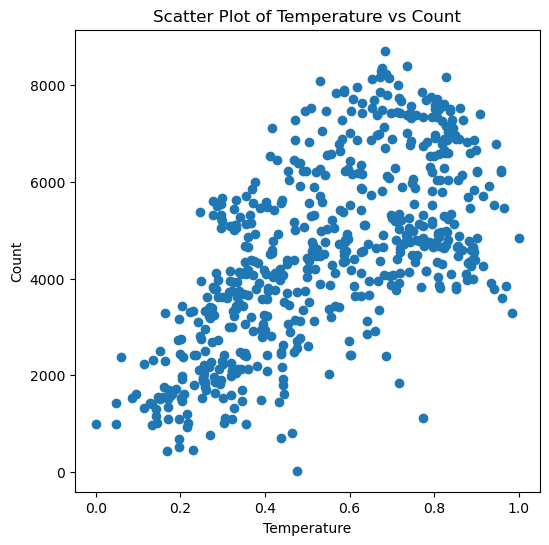

In [1420]:
plt.figure(figsize=[6, 6])
plt.scatter(X_train['temp'], y_train)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Scatter Plot of Temperature vs Count')
plt.show()

- The scatter plot of temperature against bike rental count reveals a positive correlation, indicating that higher temperatures generally lead to more bike rentals. However, there appears to be an optimal temperature range where rentals peak, suggesting that extremely high temperatures might deter some users. This pattern highlights the importance of favorable weather conditions in promoting bike rentals, with warmer seasons (e.g., spring and summer) seeing higher usage compared to colder seasons (e.g., winter). This insight can help in planning and optimizing bike rental operations based on seasonal weather variations.`

In [1421]:
# Import the Linear Regression model
from sklearn.linear_model import LinearRegression

In [1422]:

# Create a Linear Regression object
regressor = LinearRegression()

In [1423]:
# Fit the model on the training data
regressor.fit(X_train, y_train)

LinearRegression()

In [1424]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=["Coefficient"])
coeff_df

,Coefficient
temp,3819.775625
hum,-1733.532270
windspeed,-1500.582044
season_spring,-810.951747
season_summer,54.018796
season_winter,649.147210
yr_2019,1930.126525
mnth_August,-146.060686
mnth_December,-459.397020
mnth_January,-458.998520


In [1425]:
# Print the coefficients and intercept

print(f'Intercept: {regressor.intercept_}')

Intercept: 4129.428205623548


In [1426]:
# Make predictions on the test data
y_pred = regressor.predict(X_test)
# Create a DataFrame to compare the actual and predicted values
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df

,Actual,Predicted
196,5923,4053.640777
187,4592,4699.929247
14,1248,1123.210261
31,1360,1033.427099
390,4075,3658.722219
...,...,...
118,4595,4402.779055
566,4459,3656.224953
688,5634,5110.255082
266,5423,4901.613353


In [1427]:
from sklearn import metrics
# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 592.5103081212914
Mean Squared Error: 573752.4685104527
Root Mean Squared Error: 757.4644998351096


In [1428]:
from sklearn.metrics import r2_score
# Calculate and print R²
print('R²:', r2_score(y_test, y_pred))

R²: 0.8704045149316654


In [1429]:
#Calculating the r-square manually for train data set

yhat = regressor.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8373120128681547 0.8291043306344761


In [1430]:
#Calculating the r-square manually for test data set
yhat = regressor.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8704045149316654 0.8393902108127477


This model has an Adjusted R-squared value of **89.93%** which seems pretty good. But let's see if we can reduce the number of features and exclude those which are not much relevant in explaining the target variable. 

In [1431]:
len(X_train.columns)

28

#### Model Building Using RFE

Now, you have close to 28 features. It is obviously not recommended to manually eliminate these features. So let's now build a model using recursive feature elimination to select features. We'll first start off with an arbitrary number of features (15 seems to be a good number to begin with), and then use the `statsmodels` library to build models using the shortlisted features (this is also because `SKLearn` doesn't have `Adjusted R-squared` that `statsmodels` has).


In [1432]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn import datasets

# Load the Iris dataset
dataset = datasets.load_iris()

# Create a LinearSVC model
svm = LinearSVC(max_iter=10000)

# Create the RFE model for the svm classifier and select top 3 features
rfe = RFE(estimator=svm, n_features_to_select=3)
rfe = rfe.fit(dataset.data, dataset.target)

# Print summaries for the selection of attributes
print("Selected Features:", rfe.support_)
print("Feature Ranking:", rfe.ranking_)


Selected Features: [False  True  True  True]
Feature Ranking: [2 1 1 1]


In [1433]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1434]:
# Create a Linear Regression object
lm = LinearRegression()

# Fit the model on the training data
lm.fit(X_train, y_train)

# Create the RFE model and select top 20 features
rfe = RFE(estimator=lm, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)


In [1435]:
# Print summaries for the selection of attributes
print("Selected Features:", rfe.support_)
print("Feature Ranking:", rfe.ranking_)

Selected Features: [ True  True  True  True False  True  True False  True  True  True False
 False  True  True False  True  True  True  True  True  True False False
 False  True  True  True]
Feature Ranking: [1 1 1 1 8 1 1 3 1 1 1 4 6 1 1 7 1 1 1 1 1 1 9 2 5 1 1 1]


In [1436]:
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_winter', 'yr_2019',
       'mnth_December', 'mnth_January', 'mnth_July', 'mnth_May',
       'mnth_November', 'mnth_September', 'mnth_february', 'holiday_Yes',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'workingday_Yes', 'weathersit_B', 'weathersit_C'],
      dtype='object')


In [1437]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_)) 

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 8),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_August', False, 3),
 ('mnth_December', True, 1),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 4),
 ('mnth_March', False, 6),
 ('mnth_May', True, 1),
 ('mnth_November', True, 1),
 ('mnth_October', False, 7),
 ('mnth_September', True, 1),
 ('mnth_february', True, 1),
 ('holiday_Yes', True, 1),
 ('weekday_Monday', True, 1),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 9),
 ('weekday_Tuesday', False, 2),
 ('weekday_Wednesday', False, 5),
 ('workingday_Yes', True, 1),
 ('weathersit_B', True, 1),
 ('weathersit_C', True, 1)]

In [1438]:
X_train_rfe =  X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,temp,hum,windspeed,season_spring,season_winter,yr_2019,mnth_December,mnth_January,mnth_July,mnth_May,mnth_November,mnth_September,mnth_february,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,workingday_Yes,weathersit_B,weathersit_C
239,0.807351,0.577650,0.581909,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
97,0.344785,0.859897,0.421794,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
503,0.673950,0.469152,0.126957,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
642,0.692641,0.645244,0.173084,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
498,0.640722,0.811911,0.392314,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0


In [1439]:

def build_model(X, y, drop_columns=[]):
    # Drop the specified columns
    if drop_columns:
        X = X.drop(columns=drop_columns)
    # Add a constant
    X = sm.add_constant(X)
    # Fit the model
    lm = sm.OLS(y, X).fit()
    # Print the model summary
    print(lm.summary())
    return X

    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

__MODEL 1:__

In [1440]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     142.9
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          1.84e-205
Time:                        22:46:15   Log-Likelihood:                -4707.6
No. Observations:                 584   AIC:                             9457.
Df Residuals:                     563   BIC:                             9549.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4168.0334    587.388  

- value of weekday_Monday, weekday_Saturday, weekday_sunday, mnth_may,mnth_february,workingday_Yes,  seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

__MODEL 2:__

In [1443]:
drop_columns = ['weekday_Monday', 'weekday_Saturday', 'weekday_Sunday', 'mnth_May','mnth_february','workingday_Yes']
X_train_new = build_model(X_train_rfe, y_train, drop_columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     195.3
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          1.20e-206
Time:                        22:50:01   Log-Likelihood:                -4720.8
No. Observations:                 584   AIC:                             9472.
Df Residuals:                     569   BIC:                             9537.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3571.9319    279.172     12.

- value of mnth_January,holiday_Yes seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

__MODEL 3:__

In [1445]:
drop_columns = ['mnth_January','holiday_Yes','weekday_Monday','weekday_Saturday', 'weekday_Sunday', 'mnth_May','mnth_february','workingday_Yes']
X_train_new = build_model(X_train_rfe, y_train, drop_columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     223.6
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          1.10e-206
Time:                        22:53:03   Log-Likelihood:                -4726.3
No. Observations:                 584   AIC:                             9479.
Df Residuals:                     571   BIC:                             9535.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3465.5211    277.643     12.

- Now our model seems to be good 

### Residual Analysis of Model

In [1446]:
lm = sm.OLS(y_train, X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

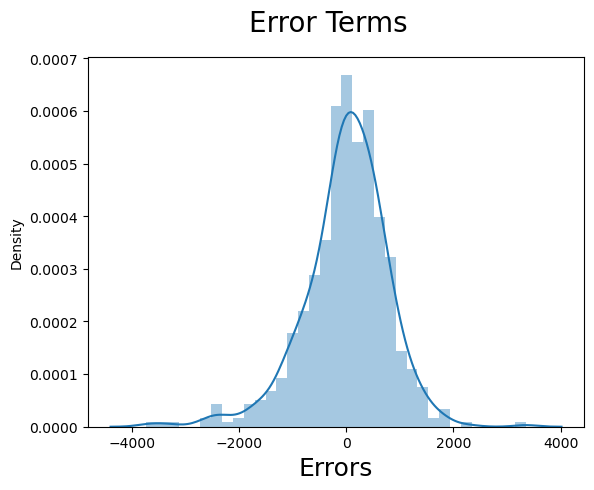

In [1449]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(y_train - y_train_price)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

- Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

__Prediction and Evaluation__

In [1450]:
X_train_new.shape

(584, 13)

In [1451]:
X_train_new.columns

Index(['const', 'temp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'yr_2019', 'mnth_December', 'mnth_July', 'mnth_November',
       'mnth_September', 'weathersit_B', 'weathersit_C'],
      dtype='object')

In [1452]:
X_train_new = build_model(X_train_rfe, y_train, drop_columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     223.6
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          1.10e-206
Time:                        23:10:20   Log-Likelihood:                -4726.3
No. Observations:                 584   AIC:                             9479.
Df Residuals:                     571   BIC:                             9535.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3465.5211    277.643     12.

- the results seem to be unchanged so we can say this is our final model